<a href="https://colab.research.google.com/github/dibadabir/Project3A23/blob/main/Sentimental_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries

In [99]:
# Regular expression module allows pattern matching and manipulation of strings
import re
# Making dataframe
import pandas as pd
# Saving data into numpy array
import numpy as np
# The natrual language processing to process sentences
import nltk
# Used to display they results on a bar chart (graph)
import matplotlib.pyplot as plt
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
# Splitting our dataset into train and test
from sklearn.model_selection import train_test_split
# Get the report from evaluating models
from sklearn.metrics import classification_report, accuracy_score
# Converting text data into numerical vectors so that the machine can read it
from sklearn.feature_extraction.text import TfidfVectorizer
# Saving and loading the model
import pickle

# Loading the dataset

In [100]:
# Load the data from excel file
data = pd.read_excel('/content/Training Dataset.xlsx')

# Extract sentences and labels
sentences = data['sentence'].values
labels = data['sentiment'].values

# Split the data into training and testing sets (80% for training, 20% for testing)
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, shuffle=True, test_size=0.2, random_state=230)

# Vectorize the text data using TfidfVectorizer
vec = TfidfVectorizer()                                         # Vectorizing the text
train_sentences_vectors = vec.fit_transform(train_sentences)    # Feed the training dataset to our model
test_sentences_vectors = vec.transform(test_sentences)          # Transform the test data so that the machine can perform the analysis

# Function to visualise the evaluation report

In [101]:
def display (report, title):
  # Extracting the evaluation matrices from Classification report
  class_names = list(report.keys())[:-3]  # columns from classification report exclude 'accuracy', 'macro avg', and 'weighted avg'

  # Plotting
  plt.figure(figsize=(12, 6))

  # Display precision, recall, f1-score
  plt.subplot(1, 2, 2)
  precision = [report[label]['precision'] for label in class_names]
  recall = [report[label]['recall'] for label in class_names]
  f1_score = [report[label]['f1-score'] for label in class_names]

  bar_width = 0.2
  index = range(len(class_names))

  # Choosing colors for bars
  colors = ['#FFB6C1', '#C0C0C0', '#120C6E']

  # Displaying each matric with diffrent color
  # Precision
  plt.bar(index, precision, width=bar_width, color=colors[0], label='Precision', edgecolor='black')
  # Recall
  plt.bar([i + bar_width for i in index], recall, width=bar_width, color=colors[1], label='Recall', edgecolor='black')
  # F1-Score
  plt.bar([i + 2 * bar_width for i in index], f1_score, width=bar_width, color=colors[2], label='F1-Score', edgecolor='black')

  # Labeling the x-axes
  plt.xlabel('Sentiment')
  plt.xticks([i + 1.5 * bar_width for i in index], class_names)
  # Naming the whole graph
  plt.title(title)
  plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy percentage
  # Mapping out the meaning of each bar
  plt.legend()

  plt.tight_layout()
  plt.show()

# Random Forest Model

In [102]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Initialize and train the Random Forest classifier
clf_rf = RandomForestClassifier()  # Initialize RandomForestClassifier
clf_rf.fit(train_sentences_vectors, train_labels)  # Fit the classifier on the training data

# Predict using the trained Random Forest classifier
clf_rf_pred = clf_rf.predict(test_sentences_vectors)

# Evaluate the model using accuracy_score and Classification_report functions
print("Random Forest Accuracy:", accuracy_score(test_labels, clf_rf_pred))


Random Forest Accuracy: 0.6560283687943262


# Save the model

In [103]:
# Save model to a file
model_save_path = '/content/drive/MyDrive/RandomForest_model.pkl'
with open(model_save_path, 'wb') as f:
  pickle.dump(clf_rf, f)

print(f'Random Forest model saved to {model_save_path}')

Random Forest model saved to /content/drive/MyDrive/RandomForest_model.pkl


# Loading the Model

In [104]:
# Load the model
model_load_path = '/content/drive/MyDrive/RandomForest_model.pk'
with open(model_save_path, 'rb') as f:
  RF_model = pickle.load(f)

# Load the Unknown Data

In [105]:
# Load the Excel file
excel_file = pd.ExcelFile('/content/Speech to Text (Combined, no number, CLEANED) - Vader.xlsx')

# List all sheet names
sheet_names = excel_file.sheet_names

print('Sheet names from the file:\n')
for i in sheet_names:
  print(i)

Sheet names from the file:

Combined
E-Commerce
Education
Fashion
GenAI
Healthcare
Travel


# Predicting E-Commerce

In [106]:
# Choose a specific sheet
selected_sheet = 'E-Commerce'

# Saving the data in a dataframe
ecommerce_speech = excel_file.parse(selected_sheet)

ecommerce_speech_vec = vec.transform(ecommerce_speech['sentence'].values)

# Predict using the trained Random Forest classifier
ecommerce_pred = RF_model.predict(ecommerce_speech_vec)

Counting the results

In [107]:
# Initialize counts for each sentiment
ecommerce_sentiment_counts = {'postive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in ecommerce_pred:
    ecommerce_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", ecommerce_sentiment_counts['postive'])
print("Number of negatives:", ecommerce_sentiment_counts['negative'])
print("Number of neutrals:", ecommerce_sentiment_counts['neutral'])

Number of positives: 66
Number of negatives: 23
Number of neutrals: 113


Visualising on pie chart

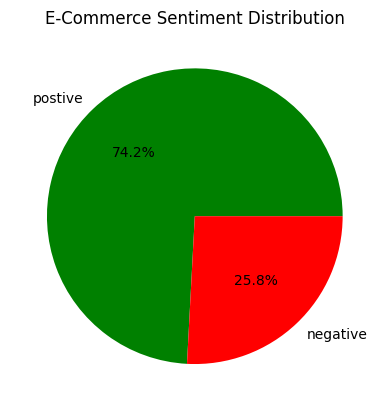

In [108]:
# Extract sentiments and counts for only positive and negative sentiments
labels = ['postive', 'negative']
counts = [ecommerce_sentiment_counts[label] for label in labels]

# Create pie chart
plt.pie(counts, labels=labels,  autopct='%1.1f%%', colors=['green', 'red'])

# Add title
plt.title('E-Commerce Sentiment Distribution')

# Show plot
plt.show()

# Predicting Education

In [109]:
# Choose a specific sheet
selected_sheet = 'Education'

# Saving the data in a dataframe
education_speech = excel_file.parse(selected_sheet)

education_speech_vec = vec.transform(education_speech['sentence'].values)

# Predict using the trained Random Forest classifier
education_pred = RF_model.predict(education_speech_vec)

Counting the results

In [110]:
# Initialize counts for each sentiment
education_sentiment_counts = {'postive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in education_pred:
    education_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", education_sentiment_counts['postive'])
print("Number of negatives:", education_sentiment_counts['negative'])
print("Number of neutrals:", education_sentiment_counts['neutral'])

Number of positives: 58
Number of negatives: 28
Number of neutrals: 148


Visualising on pie chart

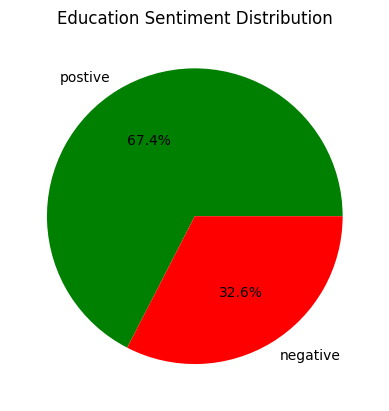

In [111]:
# Extract sentiments and counts for only positive and negative sentiments
labels = ['postive', 'negative']
counts = [education_sentiment_counts[label] for label in labels]

# Create pie chart
plt.pie(counts, labels=labels,  autopct='%1.1f%%', colors=['green', 'red'])

# Add title
plt.title('Education Sentiment Distribution')

# Show plot
plt.show()

# Predicting Fashion

In [112]:
# Choose a specific sheet
selected_sheet = 'Fashion'

# Saving the data in a dataframe
fashion_speech = excel_file.parse(selected_sheet)

fashion_speech_vec = vec.transform(fashion_speech['sentence'].values)

# Predict using the trained Random Forest classifier
fashion_pred = RF_model.predict(fashion_speech_vec)

counting the reults

In [113]:
# Initialize counts for each sentiment
fashion_sentiment_counts = {'postive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in fashion_pred:
    fashion_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", fashion_sentiment_counts['postive'])
print("Number of negatives:", fashion_sentiment_counts['negative'])
print("Number of neutrals:", fashion_sentiment_counts['neutral'])

Number of positives: 93
Number of negatives: 31
Number of neutrals: 273


Visualising on pie chart

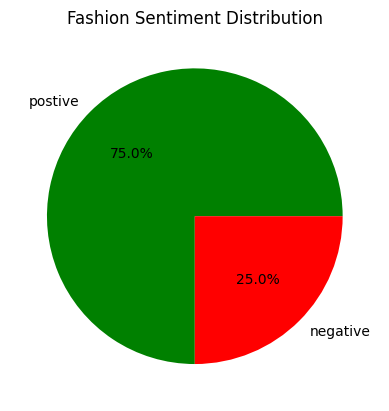

In [114]:
# Extract sentiments and counts for only positive and negative sentiments
labels = ['postive', 'negative']
counts = [fashion_sentiment_counts[label] for label in labels]

# Create pie chart
plt.pie(counts, labels=labels,  autopct='%1.1f%%', colors=['green', 'red'])

# Add title
plt.title('Fashion Sentiment Distribution')

# Show plot
plt.show()

# Predicting Generative AI

In [115]:
# Choose a specific sheet
selected_sheet = 'GenAI'

# Saving the data in a dataframe
genai_speech = excel_file.parse(selected_sheet)

genai_speech_vec = vec.transform(genai_speech['sentence'].values)

# Predict using the trained Random Forest classifier
genai_pred = RF_model.predict(genai_speech_vec)

Counting the results

In [116]:
# Initialize counts for each sentiment
genai_sentiment_counts = {'postive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in genai_pred:
    genai_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", genai_sentiment_counts['postive'])
print("Number of negatives:", genai_sentiment_counts['negative'])
print("Number of neutrals:", genai_sentiment_counts['neutral'])

Number of positives: 106
Number of negatives: 52
Number of neutrals: 177


Visualising on pie chart

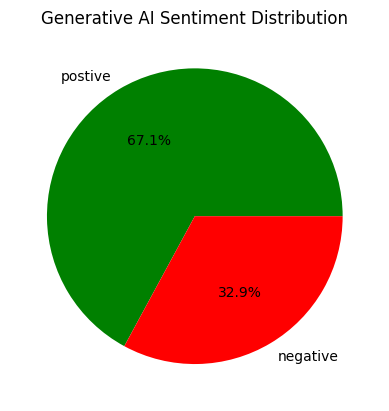

In [117]:
# Extract sentiments and counts for only positive and negative sentiments
labels = ['postive', 'negative']
counts = [genai_sentiment_counts[label] for label in labels]

# Create pie chart
plt.pie(counts, labels=labels,  autopct='%1.1f%%', colors=['green', 'red'])

# Add title
plt.title('Generative AI Sentiment Distribution')

# Show plot
plt.show()

# Predicting Healthcare

In [118]:
# Choose a specific sheet
selected_sheet = 'Healthcare'

# Saving the data in a dataframe
healthcare_speech = excel_file.parse(selected_sheet)

healthcare_speech_vec = vec.transform(healthcare_speech['sentence'].values)

# Predict using the trained Random Forest classifier
healthcare_pred = RF_model.predict(healthcare_speech_vec)

Counting the results

In [119]:
# Initialize counts for each sentiment
healthcare_sentiment_counts = {'postive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in healthcare_pred:
    healthcare_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", healthcare_sentiment_counts['postive'])
print("Number of negatives:", healthcare_sentiment_counts['negative'])
print("Number of neutrals:", healthcare_sentiment_counts['neutral'])

Number of positives: 73
Number of negatives: 38
Number of neutrals: 82


Visualising on pie chart

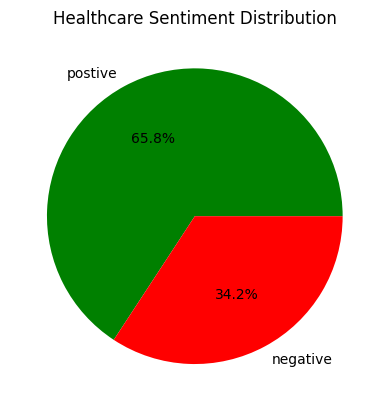

In [120]:
# Extract sentiments and counts for only positive and negative sentiments
labels = ['postive', 'negative']
counts = [healthcare_sentiment_counts[label] for label in labels]

# Create pie chart
plt.pie(counts, labels=labels,  autopct='%1.1f%%', colors=['green', 'red'])

# Add title
plt.title('Healthcare Sentiment Distribution')

# Show plot
plt.show()

# Predicting Travel

In [121]:
# Choose a specific sheet
selected_sheet = 'Travel'

# Saving the data in a dataframe
travel_speech = excel_file.parse(selected_sheet)

travel_speech_vec = vec.transform(travel_speech['sentence'].values)

# Predict using the trained Random Forest classifier
travel_pred = RF_model.predict(travel_speech_vec)

Counting the results

In [122]:
# Initialize counts for each sentiment
travel_sentiment_counts = {'postive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in travel_pred:
    travel_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", travel_sentiment_counts['postive'])
print("Number of negatives:", travel_sentiment_counts['negative'])
print("Number of neutrals:", travel_sentiment_counts['neutral'])

Number of positives: 43
Number of negatives: 21
Number of neutrals: 65


Visualising on pie chart

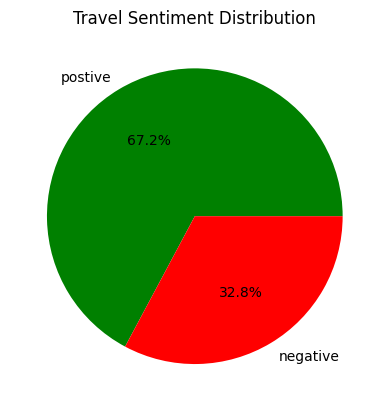

In [123]:
# Extract sentiments and counts for only positive and negative sentiments
labels = ['postive', 'negative']
counts = [travel_sentiment_counts[label] for label in labels]

# Create pie chart
plt.pie(counts, labels=labels,  autopct='%1.1f%%', colors=['green', 'red'])

# Add title
plt.title('Travel Sentiment Distribution')

# Show plot
plt.show()